In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
def to_one_hot(y, num_classes=10):
    return np.eye(num_classes)[y]

# Charger les données MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# cast to np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Prétraitement des données
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train_one_hot = to_one_hot(y_train)

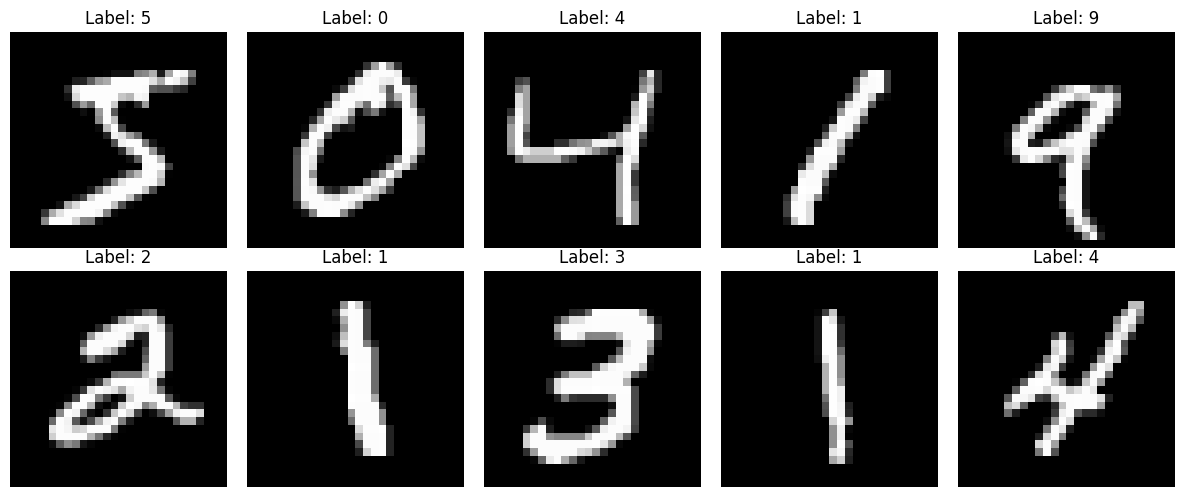

In [3]:
# Visualiser quelques images d'entraînement
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
#Entrainer le modèle
from LeafNetwork import *
from LeafNetwork import LearningRateUtils
from LeafNetwork import DenseStable, ReLU

nn = LeafNetwork(784)
nn.add(DenseStable(784, 128))
nn.add(ReLU())
nn.add(DenseStable(128, 64))
nn.add(ReLU())
nn.add(DenseStable(64, 10))

import time
start = time.time()
history = nn.train(X_train[:40000], y_train_one_hot[:40000], epochs=25, learning_rate=0.006, lr_adjustment_func= LearningRateUtils.adaptive_percentage)
end = time.time()
print(f"Temps d'entraînement: {end - start:.2f}s")
nn.save("leaf_mnist_model.json")

Epoch: 0 - Error: 0.037157 - Learning Rate: 0.006000
Epoch: 1 - Error: 0.020507 - Learning Rate: 0.006600
Epoch: 2 - Error: 0.016630 - Learning Rate: 0.007224
Epoch: 3 - Error: 0.014267 - Learning Rate: 0.007737
Epoch: 4 - Error: 0.012632 - Learning Rate: 0.008180
Epoch: 5 - Error: 0.011628 - Learning Rate: 0.008506
Epoch: 6 - Error increased. Rolling back. New Learning Rate: 0.004253
Epoch: 7 - Error: 0.010454 - Learning Rate: 0.004508
Epoch: 8 - Error: 0.010115 - Learning Rate: 0.004581
Epoch: 9 - Error: 0.009885 - Learning Rate: 0.004633
Epoch: 10 - Error: 0.009817 - Learning Rate: 0.004633
Epoch: 11 - Error increased. Rolling back. New Learning Rate: 0.002316
Epoch: 12 - Error: 0.008916 - Learning Rate: 0.002438
Epoch: 13 - Error: 0.008818 - Learning Rate: 0.002451
Epoch: 14 - Error: 0.008712 - Learning Rate: 0.002466
Epoch: 15 - Error: 0.008626 - Learning Rate: 0.002466
Epoch: 16 - Error: 0.008547 - Learning Rate: 0.002466
Epoch: 17 - Error: 0.008483 - Learning Rate: 0.002466
Epoc

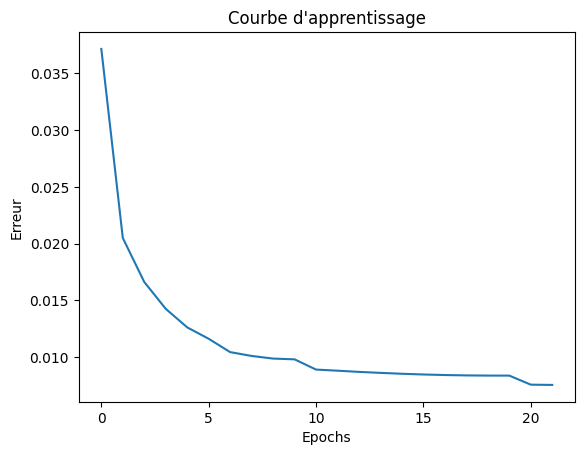

In [5]:
plt.plot(nn.error_history)
plt.title('Courbe d\'apprentissage')
plt.xlabel('Epochs')
plt.ylabel('Erreur')
plt.show()

In [6]:
#load model
last_nn = nn
from LeafNetwork import *
nn = LeafNetwork.load("leaf_mnist_model.json")

The class DenseStable was created without calling the constructor because it has parameters. If you need to perform any initialization at the beginning, please implement the `dynamic_init` method to initialize your values.
The class DenseStable was created without calling the constructor because it has parameters. If you need to perform any initialization at the beginning, please implement the `dynamic_init` method to initialize your values.
The class DenseStable was created without calling the constructor because it has parameters. If you need to perform any initialization at the beginning, please implement the `dynamic_init` method to initialize your values.


In [7]:
# Tester le réseau
predictions = nn.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_labels == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9666


In [8]:
import numpy as np
import timeit

def test_accuracy(network, X_test, y_test):
    predictions = network.predict(X_test)
    predicted_labels = np.argmax(predictions, axis=1)
    accuracy = np.mean(predicted_labels == y_test)
    return accuracy

def benchmark_nn():
    return test_accuracy(nn, X_test, y_test)

def benchmark_lastnn():
    return test_accuracy(last_nn, X_test, y_test)

lastnn_time = timeit.timeit(benchmark_lastnn, number=1)
lastnn_accuracy = benchmark_lastnn()

nn_time = timeit.timeit(benchmark_nn, number=1)
nn_accuracy = benchmark_nn()



print(f"Loaded NN - Test Accuracy: {nn_accuracy:.4f}, Time: {nn_time:.4f} seconds")
print(f"Original NN - Test Accuracy: {lastnn_accuracy:.4f}, Time: {lastnn_time:.4f} seconds")

Loaded NN - Test Accuracy: 0.9666, Time: 1.1472 seconds
Original NN - Test Accuracy: 0.9666, Time: 1.2342 seconds


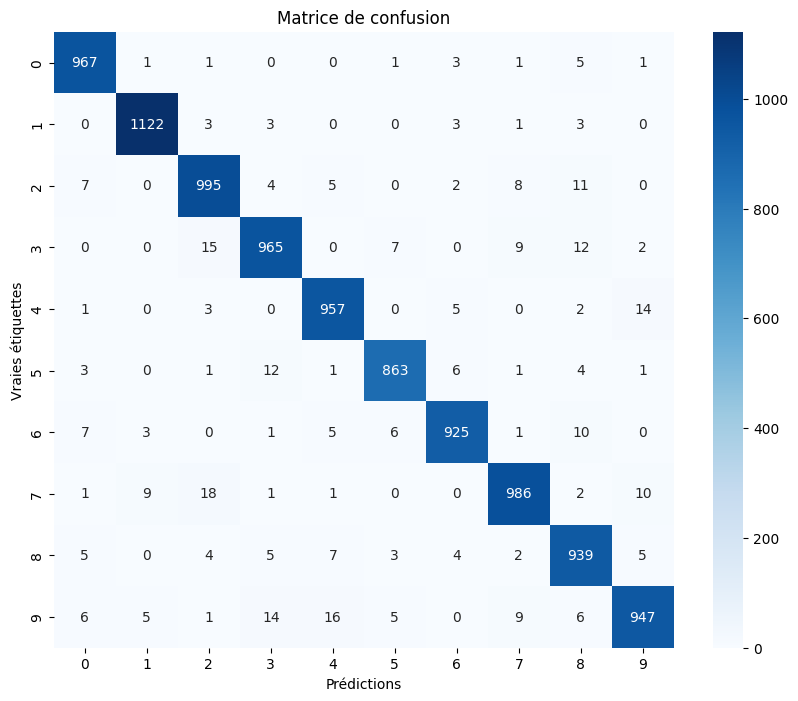

In [9]:
# Afficher la matrice de confusion
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.savefig('images/confusion_matrix.png')
plt.show()

Score: 15/15


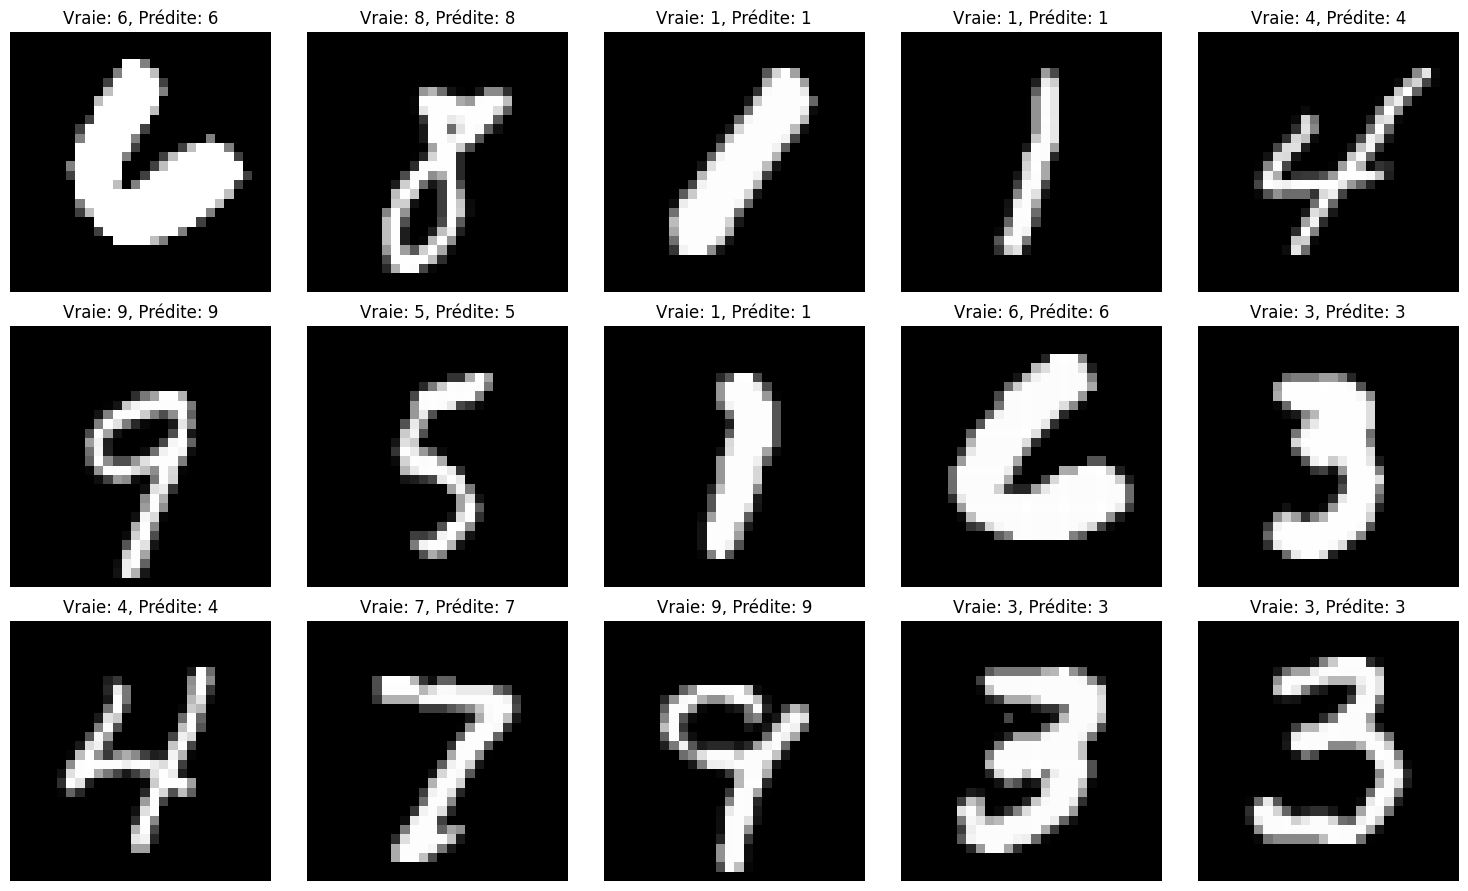

In [10]:
# Visualiser quelques prédictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
current_score = 0
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(len(X_test))
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f'Vraie: {y_test[idx]}, Prédite: {predicted_labels[idx]}')
    if y_test[idx] == predicted_labels[idx]:
        current_score += 1
    ax.axis('off')
plt.tight_layout()
# print score
print(f"Score: {current_score}/{len(axes.flat)}")
plt.show()